# Longest segment through mean

This notebook shows a simple example on how to use the code contained in the `extractor_class.py` file.
This is used when we have a set of points that compose the border of a shape, and we want to extract the segments that start from the points on the border, pass through the mean point, and arrive on another point on the border.

## Importing libraries and data

In [1]:
from extractor_class import SegThroughMeanExt

import plotly.express as px
import plotly.graph_objects as go
import numpy as np

%reload_ext autoreload
%autoreload 2

Data shape: (32, 2)


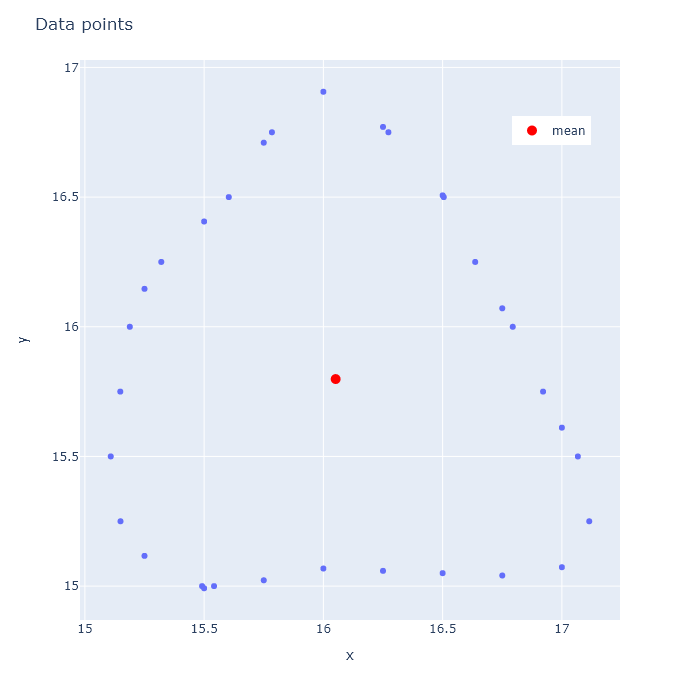

In [2]:
# Load the data and the mean point
data = np.load("points.npy")
mean_point = (np.mean(data[:, 0]), np.mean(data[:, 1]))

# Check the shape of the data
print(f"Data shape: {data.shape}")

# ----------------------------- plot -----------------------------
# for plotly
mean_marker = dict(color="red", size=10)
layout = {"width": 700, "height": 700, "legend": {"x": 0.8, "y": 0.9}}

fig = px.scatter(x=data[:, 0], y=data[:, 1])
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        name="mean",
        marker=mean_marker,
    )
)
fig.update_layout(title="Data points", **layout)
fig.show("png")

## Finding the consecutive segments

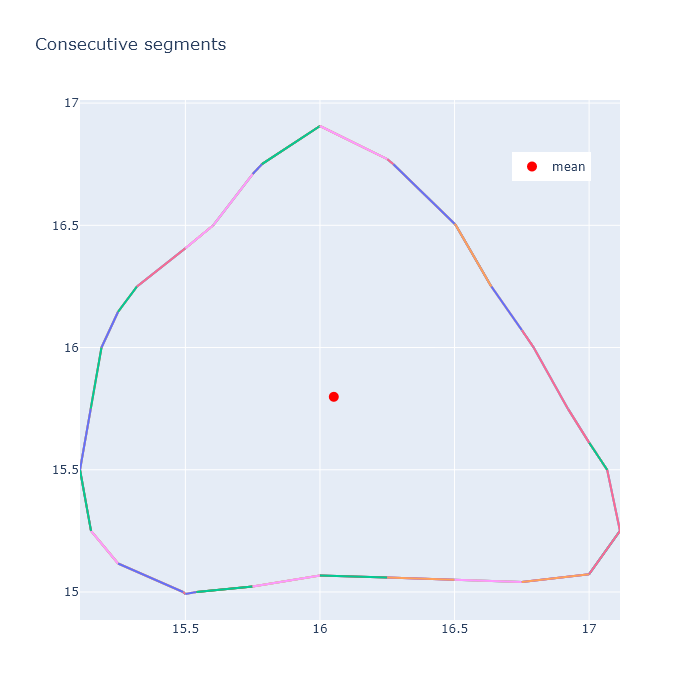

In [4]:
# first define the extractor
ext = SegThroughMeanExt()

# get the consecutive segments in the data
segments = ext.get_consecutive_segments(data)

# ----------------------------- plot -----------------------------
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        name="mean",
        marker=mean_marker,
    )
)
for segment in segments:
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            showlegend=False,
            mode="lines",
        )
    )
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            mode="lines",
            showlegend=False,
        )
    )

fig.update_layout(title="Consecutive segments", **layout)
fig.show("png")

### Get all the segments through the mean and extract the longest one

The length of the longest segment is 2.0611 mm
The length of the shortest segment is 1.7154 mm


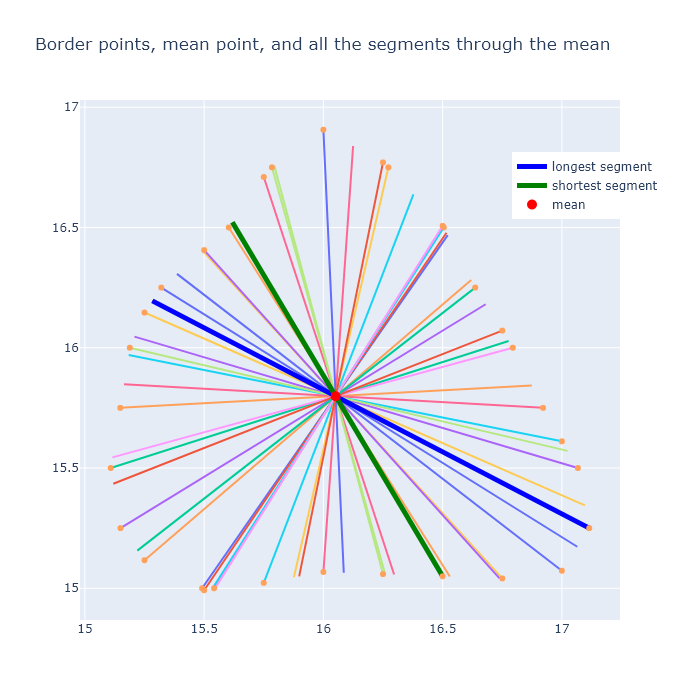

In [6]:
# get segments through mean
all_segments_through_mean = ext.get_all_segments_through_point(
    border_points=data, through_point=mean_point, consecutive_segments=segments
)

# get the longest segment
(max_segment, max_length), (min_segment, min_length) = ext.find_max_min_segment(
    all_segments_through_mean
)

print(f"The length of the longest segment is {max_length:.4f} mm")
print(f"The length of the shortest segment is {min_length:.4f} mm")

# ----------------------------- plot -----------------------------
fig = go.Figure()

for segment in all_segments_through_mean:
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            showlegend=False,
            mode="lines",
        )
    )

fig.add_trace(
    go.Scatter(
        x=[max_segment[0][0], max_segment[1][0]],
        y=[max_segment[0][1], max_segment[1][1]],
        mode="lines",
        name="longest segment",
        line=dict(color="blue", width=5),
    )
)

fig.add_trace(
    go.Scatter(
        x=[min_segment[0][0], min_segment[1][0]],
        y=[min_segment[0][1], min_segment[1][1]],
        mode="lines",
        name="shortest segment",
        line=dict(color="green", width=5),
    )
)

fig.add_trace(go.Scatter(x=data[:, 0], y=data[:, 1], mode="markers", showlegend=False))
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        marker=mean_marker,
        name="mean",
    )
)

fig.update_layout(
    title="Border points, mean point, and all the segments through the mean", **layout
)
fig.show("png")

## Get more points on the border for a more precise measure

The length of the longest segment is 2.0611 mm
The length of the shortest segment is 1.7089 mm


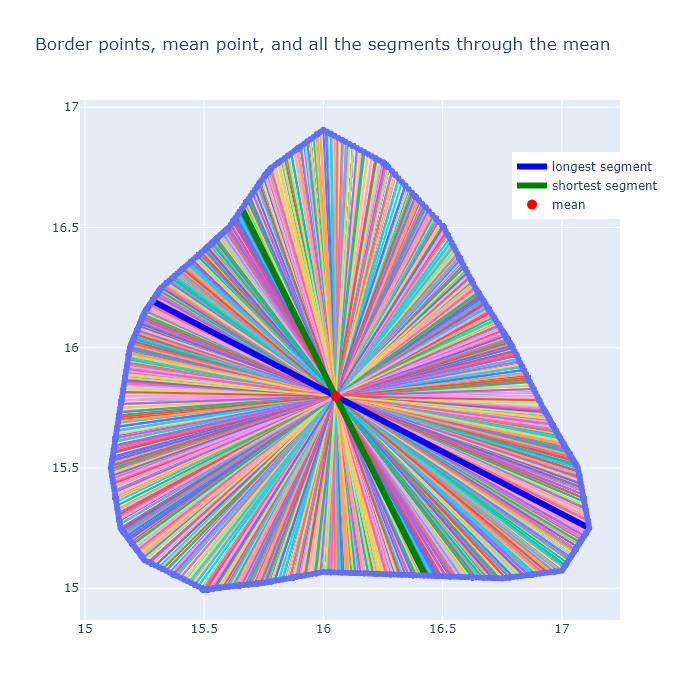

In [7]:
# get the same list of points, plus the points in the middle of each border segment
# (in alternative you can also provide an external list of points, else it uses the data points loaded before)
extra_points = ext.add_intermediate_points(points=data, times=4)

# get segments through mean, using the extra points
all_segments_through_mean = ext.get_all_segments_through_point(
    border_points=extra_points, through_point=mean_point, consecutive_segments=segments
)

# get the longest segment
(max_segment, max_length), (min_segment, min_length) = ext.find_max_min_segment(
    all_segments_through_mean
)

print(f"The length of the longest segment is {max_length:.4f} mm")
print(f"The length of the shortest segment is {min_length:.4f} mm")

# ----------------------------- plot -----------------------------
fig = go.Figure()

for segment in all_segments_through_mean:
    fig.add_trace(
        go.Scatter(
            x=[segment[0][0], segment[1][0]],
            y=[segment[0][1], segment[1][1]],
            showlegend=False,
            mode="lines",
        )
    )

fig.add_trace(
    go.Scatter(
        x=[max_segment[0][0], max_segment[1][0]],
        y=[max_segment[0][1], max_segment[1][1]],
        mode="lines",
        name="longest segment",
        line=dict(color="blue", width=6),
    )
)

fig.add_trace(
    go.Scatter(
        x=[min_segment[0][0], min_segment[1][0]],
        y=[min_segment[0][1], min_segment[1][1]],
        mode="lines",
        name="shortest segment",
        line=dict(color="green", width=6),
    )
)

fig.add_trace(
    go.Scatter(
        x=extra_points[:, 0], y=extra_points[:, 1], mode="markers", showlegend=False
    )
)
fig.add_trace(
    go.Scatter(
        x=[mean_point[0]],
        y=[mean_point[1]],
        mode="markers",
        marker=mean_marker,
        name="mean",
    )
)

fig.update_layout(
    title="Border points, mean point, and all the segments through the mean", **layout
)
fig.show("png")